In [8]:
from pynq.lib.video import dma,VideoMode

from pynq import Overlay
from pynq import Clocks
from pynq import GPIO
from pynq import Xlnk
from pynq import PL

from PIL import Image

import matplotlib.pyplot as plt
import scipy.ndimage
import matplotlib.image as mpimg

#import smbus
#from smbus import SMBus

import smbus2
from smbus2 import SMBus, i2c_msg

from pynq.lib.video import *
import pynq.lib.dma
import numpy as np
import collections
import socket
import struct
import pickle
import json
import zlib
import time
import cv2
import io

overlay = Overlay('dualmipi.bit')

In [13]:
output_2 = GPIO(GPIO.get_gpio_pin(37), 'out')
output_2.write(1)

output_1 = GPIO(GPIO.get_gpio_pin(36), 'out')
output_1.write(1)

i2c_bus_4 = smbus2.SMBus(4)
Sensor_addr = 0x3c

msg = i2c_msg.write(Sensor_addr, [0x31, 0x00])
i2c_bus_4.i2c_rdwr(msg)

msg = i2c_msg.read(Sensor_addr, 0x1)
i2c_bus_4.i2c_rdwr(msg)

data = list(msg)
print("First Camera ID is = ",hex(data[0]))

i2c_bus_3 = smbus2.SMBus(3)
Sensor_addr = 0x3c

msg = i2c_msg.write(Sensor_addr, [0x31, 0x00])
i2c_bus_3.i2c_rdwr(msg)

msg = i2c_msg.read(Sensor_addr, 0x1)
i2c_bus_3.i2c_rdwr(msg)

data = list(msg)
print("Second Camera ID is = ",hex(data[0]))

First Camera ID is =  0x78
Second Camera ID is =  0x78


virtual channel 0 status = 0x97420640
virtual channel 0 status = 0x9a920640


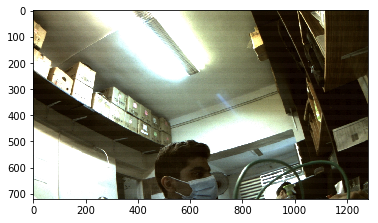

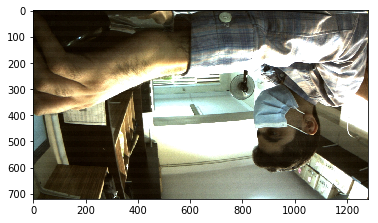

In [14]:
cfg = [[0x3008, 0x42],[0x3103, 0x03],[0x3017, 0x00],[0x3018, 0x00],[0x3034, 0x18],[0x3035, 0x11],[0x3036, 0x38],
       [0x3037, 0x11],[0x3108, 0x01],[0x303D, 0x10],[0x303B, 0x19],[0x3630, 0x2e],[0x3631, 0x0e],[0x3632, 0xe2],
       [0x3633, 0x23],[0x3621, 0xe0],[0x3704, 0xa0],[0x3703, 0x5a],[0x3715, 0x78],[0x3717, 0x01],[0x370b, 0x60],
       [0x3705, 0x1a],[0x3905, 0x02],[0x3906, 0x10],[0x3901, 0x0a],[0x3731, 0x02],[0x3600, 0x37],[0x3601, 0x33],
       [0x302d, 0x60],[0x3620, 0x52],[0x371b, 0x20],[0x471c, 0x50],[0x3a13, 0x43],[0x3a18, 0x00],[0x3a19, 0xf8],
       [0x3635, 0x13],[0x3636, 0x06],[0x3634, 0x44],[0x3622, 0x01],[0x3c01, 0x34],[0x3c04, 0x28],[0x3c05, 0x98],
       [0x3c06, 0x00],[0x3c07, 0x08],[0x3c08, 0x00],[0x3c09, 0x1c],[0x3c0a, 0x9c],[0x3c0b, 0x40],[0x503d, 0x00],
       [0x3820, 0x46],[0x300e, 0x45],[0x4800, 0x14],[0x302e, 0x08],[0x4300, 0x6f],[0x501f, 0x01],[0x4713, 0x03],
       [0x4407, 0x04],[0x440e, 0x00],[0x460b, 0x35],[0x460c, 0x20],[0x3824, 0x01],[0x5000, 0x07],[0x5001, 0x03]]

for cmd in cfg:
    #print(hex(cmd[0]))
    #print(hex(cmd[1]))
    first = cmd[0].to_bytes(2,'big')
    #print(hex(first[0]), hex(first[1]), hex(cmd[1]))
    msg = i2c_msg.write(Sensor_addr, [first[0],first[1],cmd[1]])
    i2c_bus_4.i2c_rdwr(msg)
    i2c_bus_3.i2c_rdwr(msg)

awb = [[0x518d ,0x00],[0x518f ,0x20],[0x518e ,0x00],[0x5190 ,0x20],[0x518b ,0x00],[0x518c ,0x00],[0x5187 ,0x10],
       [0x5188 ,0x10],[0x5189 ,0x40],[0x518a ,0x40],[0x5186 ,0x10],[0x5181 ,0x58],[0x5184 ,0x25],[0x5182 ,0x11],
       [0x3406 ,0x00],[0x5183 ,0x80],[0x5191 ,0xff],[0x5192 ,0x00],[0x5001 ,0x03]]

for cmd in awb:
    #print(hex(cmd[0]))
    #print(hex(cmd[1]))
    first = cmd[0].to_bytes(2,'big')
    #print(hex(first[0]), hex(first[1]), hex(cmd[1]))
    msg = i2c_msg.write(Sensor_addr, [first[0],first[1],cmd[1]])
    i2c_bus_4.i2c_rdwr(msg)
    i2c_bus_3.i2c_rdwr(msg)

res_720p = [[0x3008, 0x42],[0x3035, 0x21],[0x3036, 0x46],[0x3037, 0x05],[0x3108, 0x11],[0x3034, 0x1A],
            [0x3800, (0 >> 8) & 0x0F],[0x3801, 0 & 0xFF],[0x3802, (8 >> 8) & 0x07],[0x3803, 8 & 0xFF],
            [0x3804, (2619 >> 8) & 0x0F],[0x3805, 2619 & 0xFF],[0x3806, (1947 >> 8) & 0x07],[0x3807, 1947 & 0xFF],
            [0x3810, (0 >> 8) & 0x0F],[0x3811, 0 & 0xFF],[0x3812, (0 >> 8) & 0x07],[0x3813, 0 & 0xFF],
            [0x3808, (1280 >> 8) & 0x0F],[0x3809, 1280 & 0xFF],[0x380a, (720 >> 8) & 0x7F],[0x380b, 720 & 0xFF],
            [0x380c, (1896 >> 8) & 0x1F],[0x380d, 1896 & 0xFF],[0x380e, (984 >> 8) & 0xFF],[0x380f, 984 & 0xFF],
            [0x3814, 0x31],[0x3815, 0x31],[0x3821, 0x01],[0x4837, 36], [0x3618, 0x00], [0x3612, 0x59],[0x3708, 0x64],
            [0x3709, 0x52],[0x370c, 0x03],[0x4300, 0x00],[0x501f, 0x03],[0x3008, 0x02]]

for cmd in res_720p:
    #print(hex(cmd[0]))
    #print(hex(cmd[1]))
    first = cmd[0].to_bytes(2,'big')
    #print(hex(first[0]), hex(first[1]), hex(cmd[1]))
    msg = i2c_msg.write(Sensor_addr, [first[0],first[1],cmd[1]])
    i2c_bus_4.i2c_rdwr(msg)
    i2c_bus_3.i2c_rdwr(msg)
    
demo_0 = overlay.v_demosaic_0
demo_1 = overlay.v_demosaic_1
# gamma = overlay.v_gamma_lut_0

demo_0.write(0x10,1280)
demo_0.write(0x18,720)
demo_0.write(0x28,0x03)
demo_0.write(0x00,0x81)

demo_1.write(0x10,1280)
demo_1.write(0x18,720)
demo_1.write(0x28,0x03)
demo_1.write(0x00,0x81)

# gamma.write(0x10,1280)
# gamma.write(0x18,720)
# gamma.write(0x20,0x00)
# gamma.write(0x00,0x00)

pixel_in = overlay.pixel_pack_0
pixel_in.bits_per_pixel = 24

mipi_0 = overlay.mipi_csi2_rx_subsyst_0
op_0 =mipi_0.read(0x60)
print("virtual channel 0 status =", hex(op_0))

mipi_1 = overlay.mipi_csi2_rx_subsyst_1
op_1 =mipi_1.read(0x60)
print("virtual channel 0 status =", hex(op_1))

cam_vdma_0 = overlay.axi_vdma_0
cam_vdma_1 = overlay.axi_vdma_1
lines = 720
framemode = VideoMode(1280, lines, 24)
cam_vdma_0.readchannel.mode = framemode
cam_vdma_0.readchannel.start()
cam_vdma_1.readchannel.mode = framemode
cam_vdma_1.readchannel.start()


cam_vdma_0.readchannel.running
cam_vdma_0.readchannel.mode

cam_vdma_1.readchannel.running
cam_vdma_1.readchannel.mode

frame_camera_0 = cam_vdma_0.readchannel.readframe()
frame_camera_1 = cam_vdma_1.readchannel.readframe()
frame_camera_0 =cv2.cvtColor(frame_camera_0,cv2.COLOR_BGR2RGB)
frame_camera_1 =cv2.cvtColor(frame_camera_1,cv2.COLOR_BGR2RGB)
pixels_0 = np.array(frame_camera_0, dtype='uint8')
pixels_1 = np.array(frame_camera_1, dtype='uint8')
im_0 = Image.fromarray(pixels_0)
im_1 = Image.fromarray(pixels_1)
im_0.save("your_file2.jpeg")
im_1.save("your_file3.jpeg")
plt.imshow(pixels_0)
plt.show()
plt.imshow(pixels_1)
plt.show()

In [15]:
client_socket_right = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket_left= socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket_right.connect(('192.168.0.24', 13200))
client_socket_left.connect(('192.168.0.24', 12200))
connection_right = client_socket_right.makefile('wb')
connection_left = client_socket_left.makefile('wb')

img_counter = 0
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 90]
for i in range(0,50000):
    frame_camera_0 = cam_vdma_0.readchannel.readframe()
    frame_camera_1 = cam_vdma_1.readchannel.readframe()
    frame_camera_0 =cv2.cvtColor(frame_camera_0,cv2.COLOR_BGR2RGB)
    frame_camera_1 =cv2.cvtColor(frame_camera_1,cv2.COLOR_BGR2RGB)
    pixels_0 = np.array(frame_camera_0, dtype='uint8')
    pixels_1 = np.array(frame_camera_1, dtype='uint8')
    result, frame_0 = cv2.imencode('.jpg', frame_camera_0, encode_param)
    result, frame_1 = cv2.imencode('.jpg', frame_camera_1, encode_param)
    
    data_0 = pickle.dumps(frame_0, 0)
    size_0 = len(data_0)
    
    data_1 = pickle.dumps(frame_1, 0)
    size_1 = len(data_1)


    #print("{}: {}".format(img_counter, size))
    client_socket_right.sendall(struct.pack(">L", size_0) + data_0)
    client_socket_left.sendall(struct.pack(">L", size_1) + data_1)
    #img_counter += 1
    

ConnectionResetError: [Errno 104] Connection reset by peer